<a href="https://colab.research.google.com/github/Litharsan11/Telco_Customer_Churn_ML_CW/blob/main/2425446_20240872_Litharsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("ggplot")

In [275]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
path = '/content/drive/MyDrive/Machine_Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(path)

print("Dataset Loaded Successfully!")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [276]:
# Shape
print("Shape:", data.shape)
print()
# Summary
data.info()
print()
# Description Statics of Numeric data
print(data.describe())
print()
# Check duplicates
print("Duplicates:", data.duplicated().sum())
print()

Shape: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [277]:
# Check missing values
print("Missing Values:\n", data.isnull().sum())
print()
print("Missing Values:\n", data.isna().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [278]:
print("Blank values in every column")
for col in data.columns:
    rows = data[data[col].astype(str).str.strip() == ""]
    blanks = (data[col].astype(str).str.strip() == "").sum()
    print(f"{col}: {blanks}")
    if len(rows) > 0:
        print(f"\nRows with blanks in {col}:")
        display(rows)

Blank values in every column
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows with blanks in TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [279]:
# Remove rows where ANY column contains blank string or only spaces
data = data[~data.apply(lambda row: row.astype(str).str.strip().eq("").any(), axis=1)].reset_index(drop=True)

print("New shape after removing blank rows:", data.shape)

New shape after removing blank rows: (7032, 21)


In [280]:
# Shape before duplicate check
print("Shape:", data.shape)
print()
data = data.drop_duplicates()
# Shape after duplicate check
print("Shape:", data.shape)

Shape: (7032, 21)

Shape: (7032, 21)


In [281]:
#Convert "TotalCharges" to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')
print("Missing Values:", data.isna().sum())
print("Missing Values",data["TotalCharges"].isna().sum())
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)

Missing Values: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing Values 0


/tmp/ipython-input-1416756343.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


In [282]:
# Check Missing values again
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [283]:
# Drop Customer ID
data = data.drop("customerID", axis=1)
# Shape after dropping Cust ID
print("Shape:", data.shape)
print()
# Print top 5 rows
print("Top 5 rows")
data.head()

Shape: (7032, 20)

Top 5 rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [284]:
#Identify categorical & numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')



Churn value counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn rate:
 Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


/tmp/ipython-input-2827266951.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Churn'], palette='Set2')


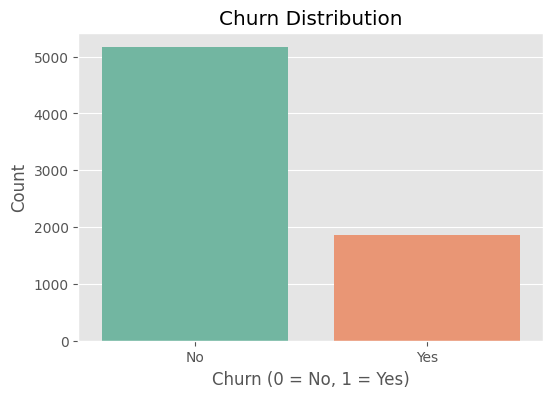

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [285]:
#Churn Distribution

# Churn distribution
print("\nChurn value counts:\n", data["Churn"].value_counts())
print("\nChurn rate:\n", data["Churn"].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x=data['Churn'], palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Churn percentage
print(data['Churn'].value_counts(normalize=True) * 100)

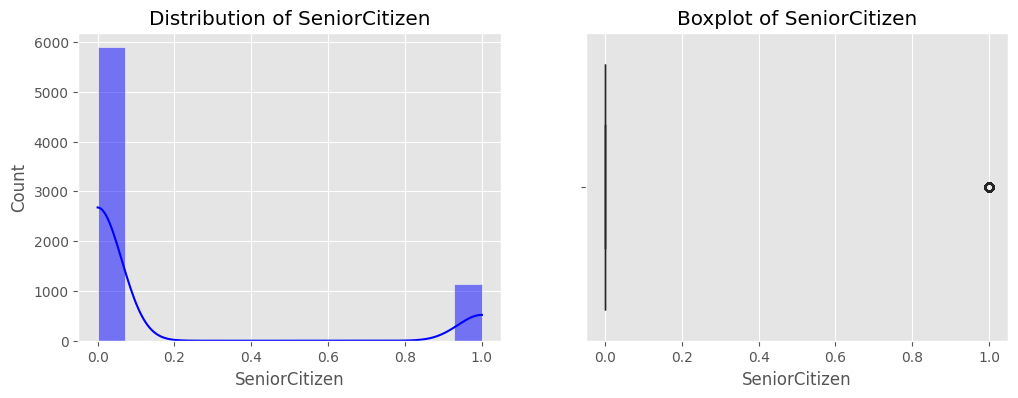

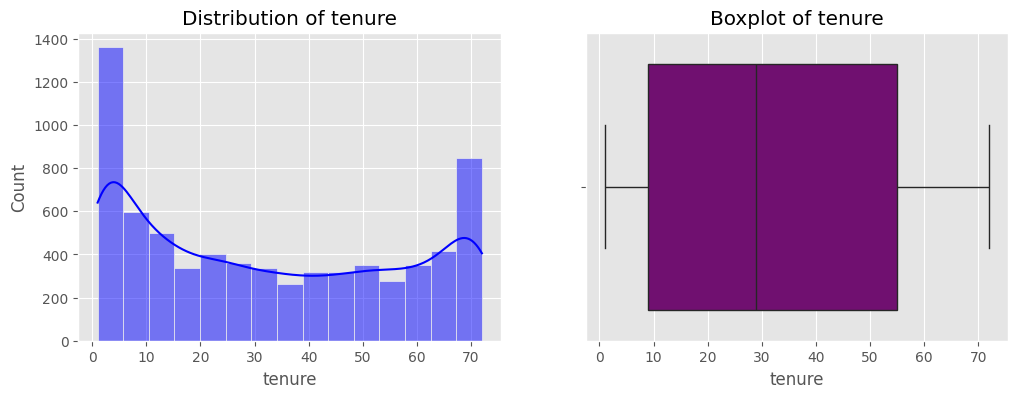

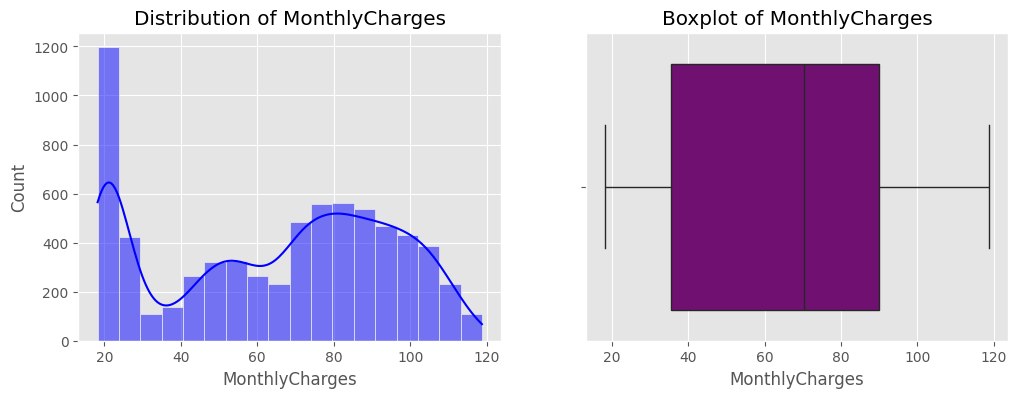

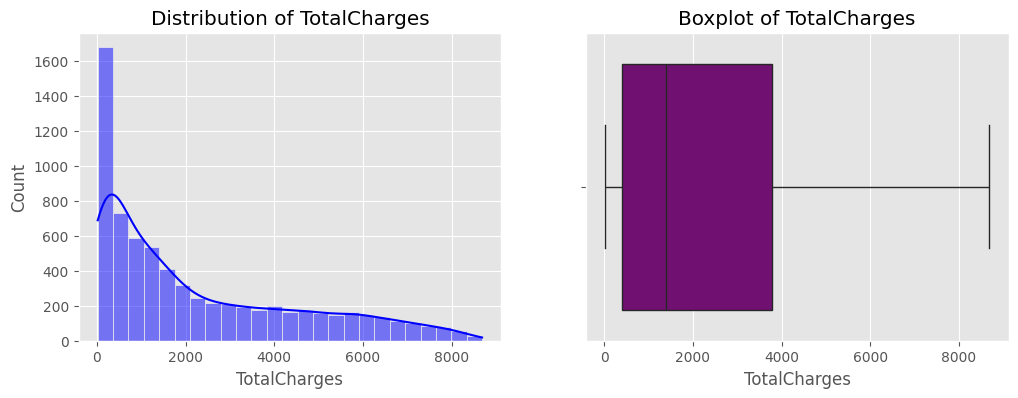

In [286]:
#Numerical Features Distribution
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color="purple")
    plt.title(f"Boxplot of {col}")

    plt.show()


/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


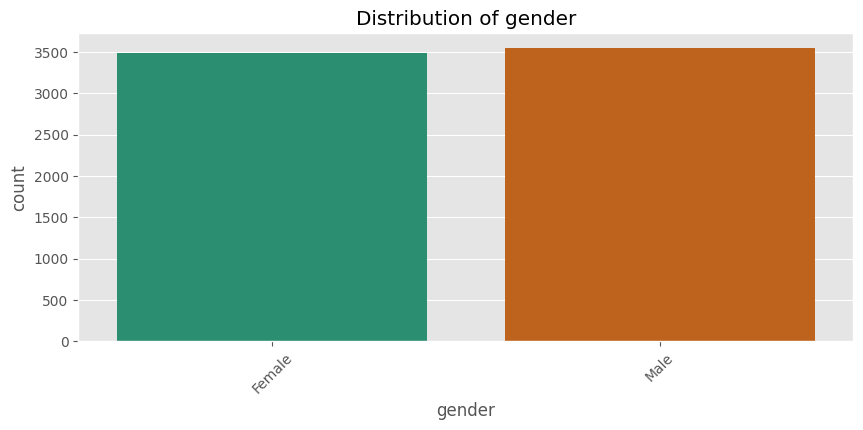

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


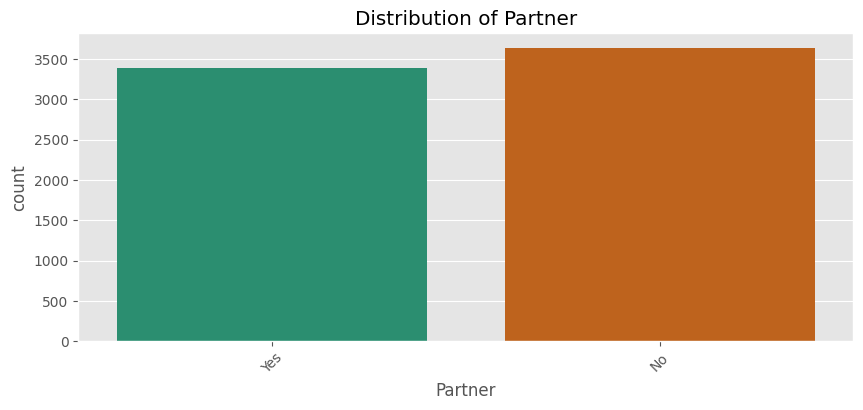

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


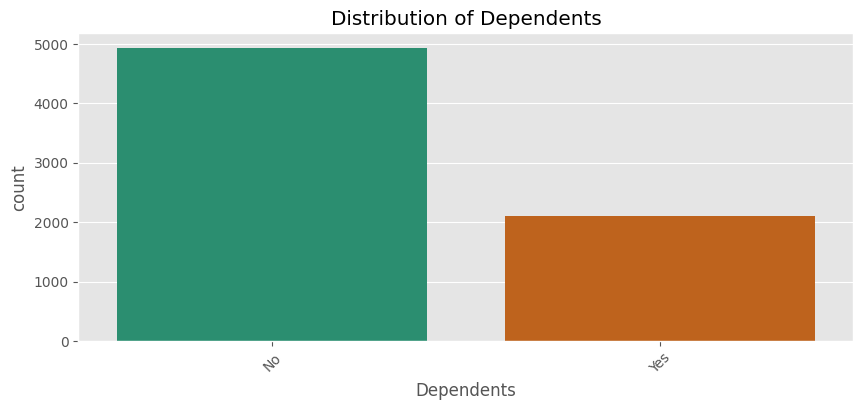

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


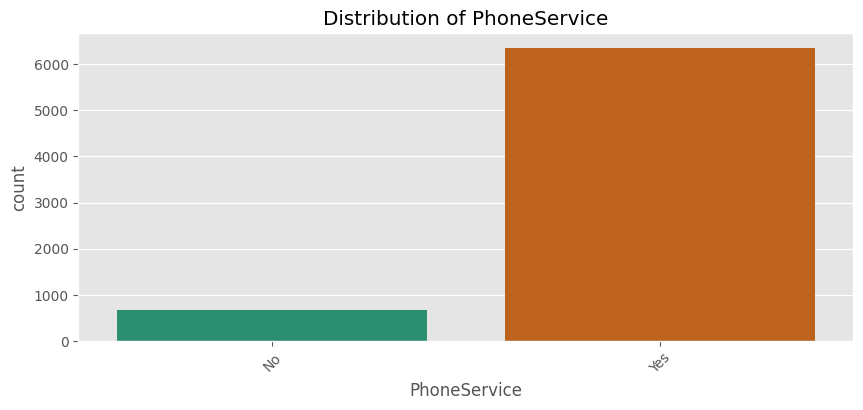

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


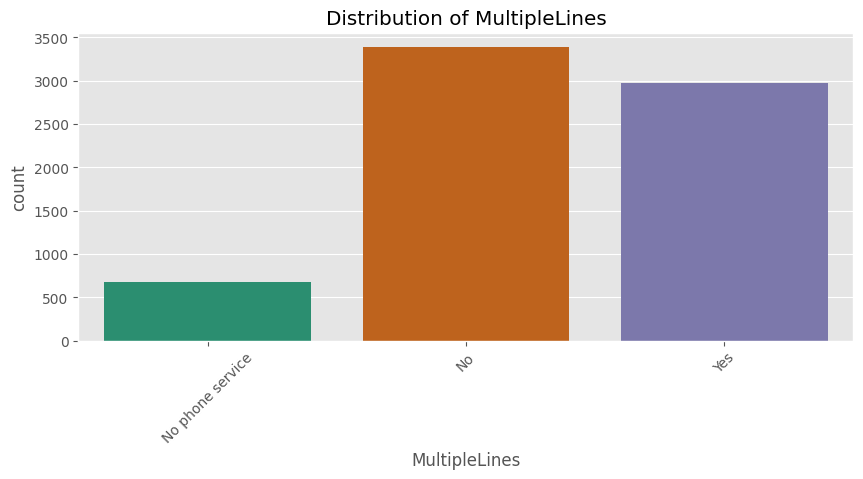

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


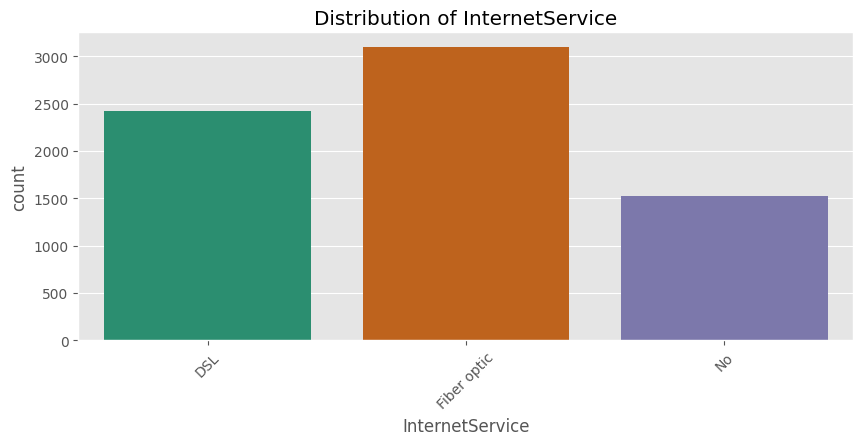

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


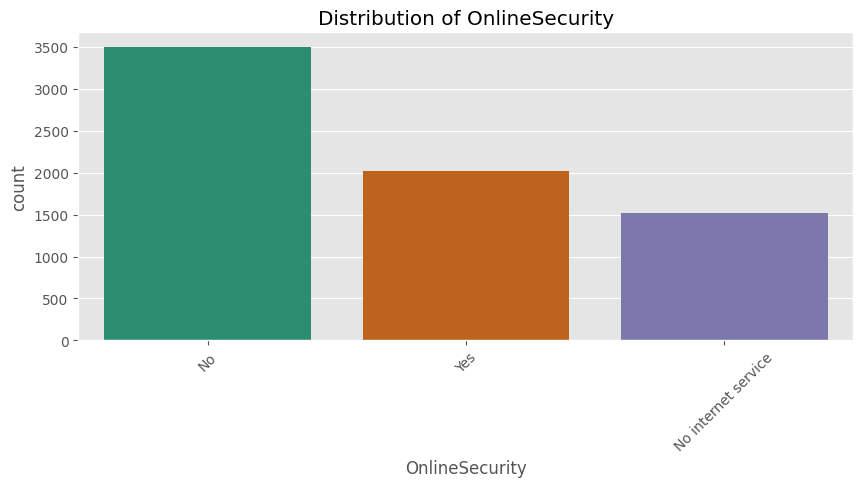

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


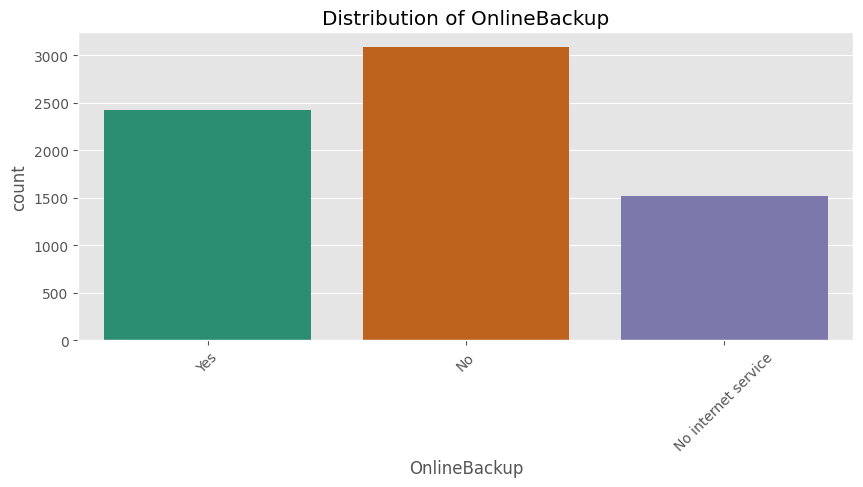

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


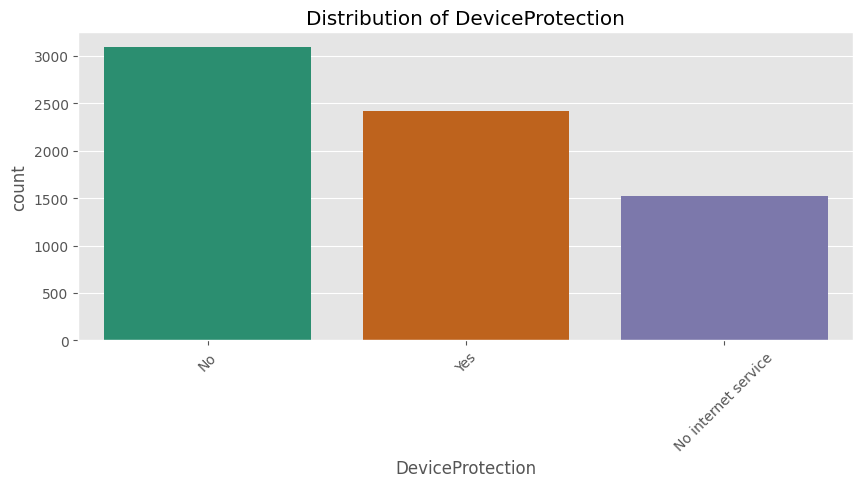

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


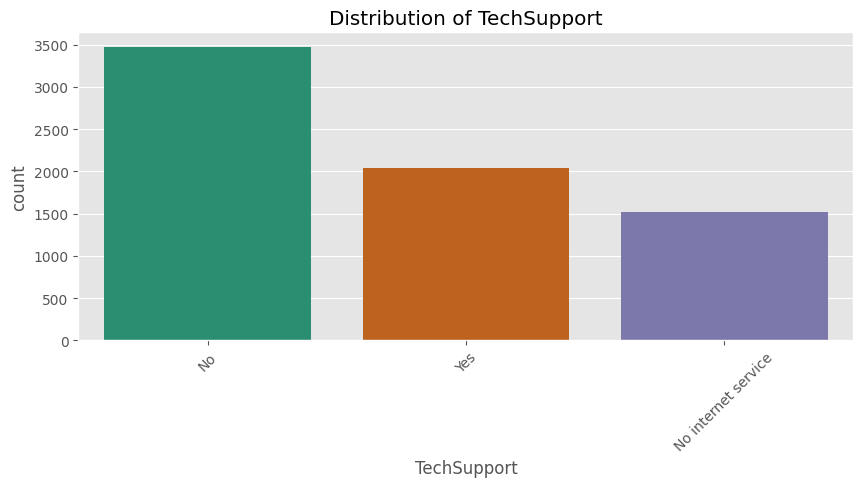

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


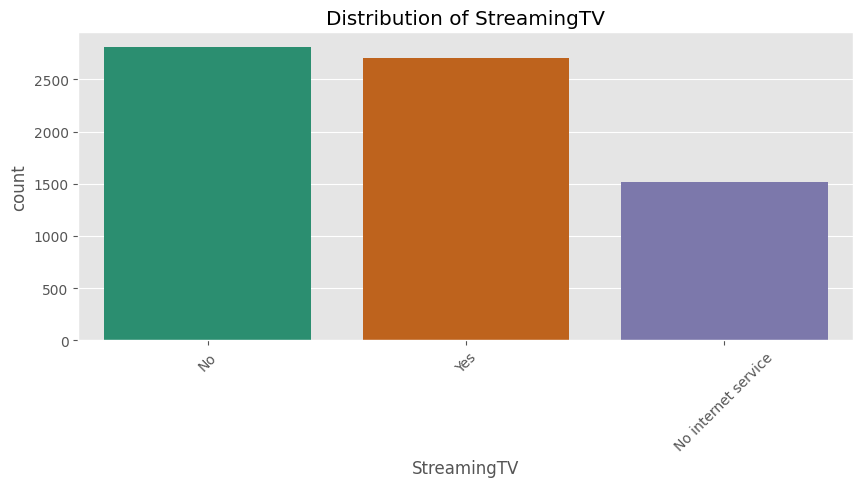

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


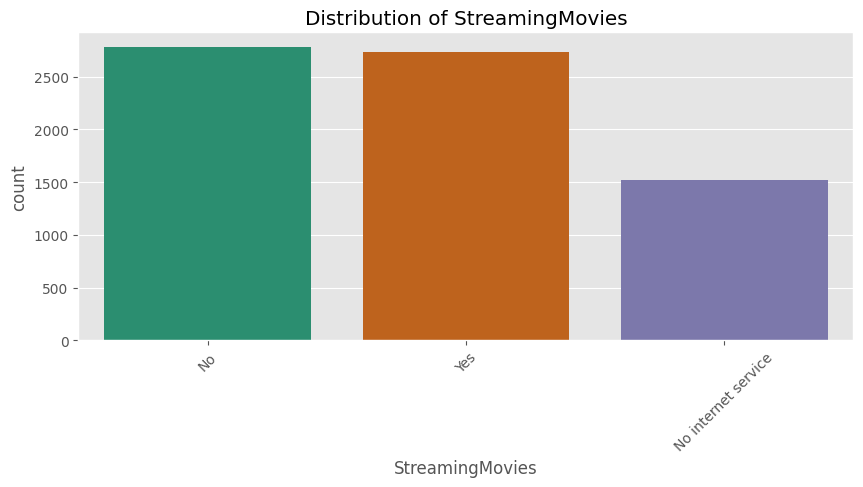

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


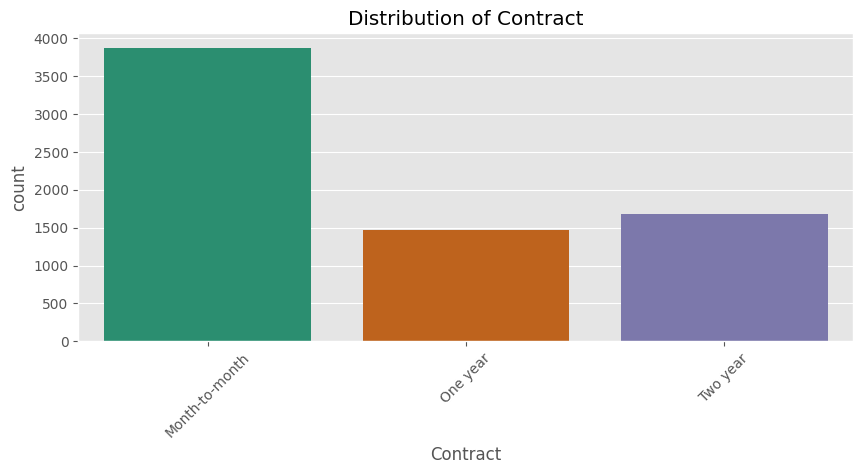

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


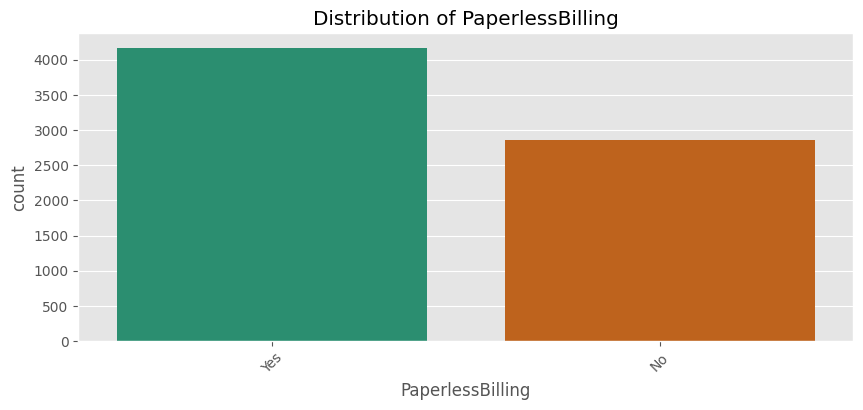

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


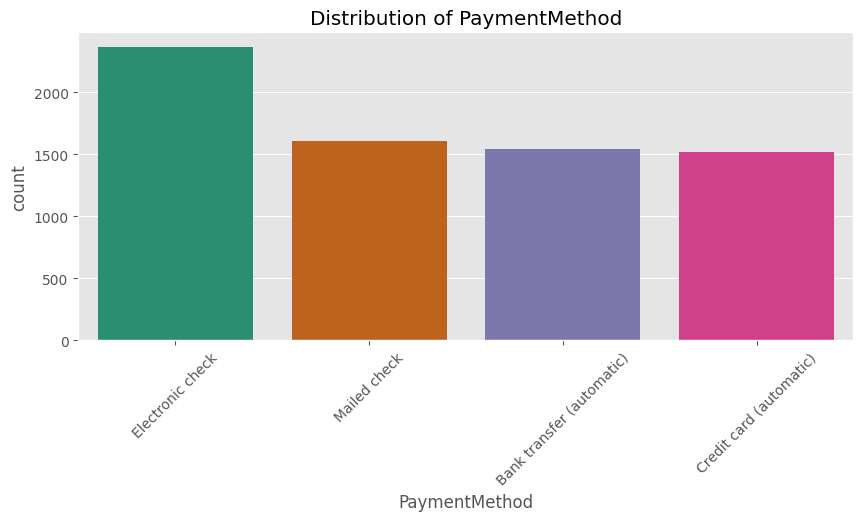

/tmp/ipython-input-923976652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Dark2')


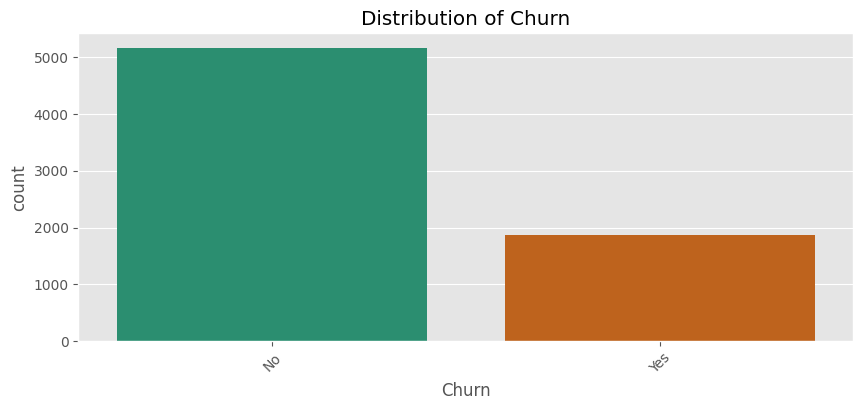

In [287]:
#Categorical Feature Distribution
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=data[col], palette='Dark2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



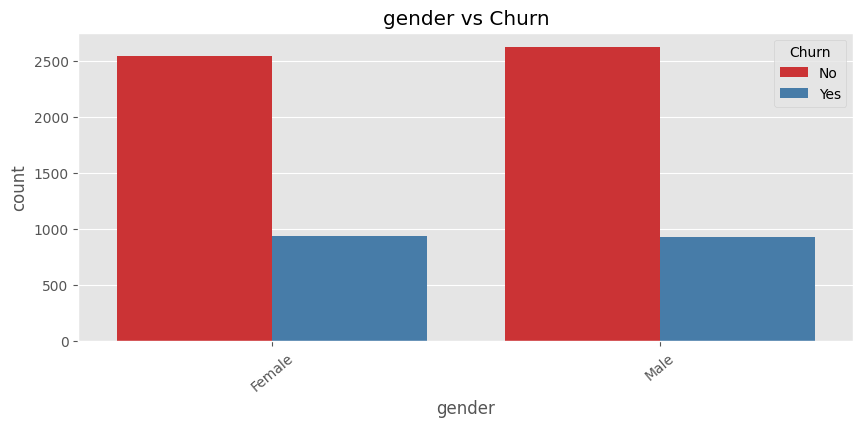

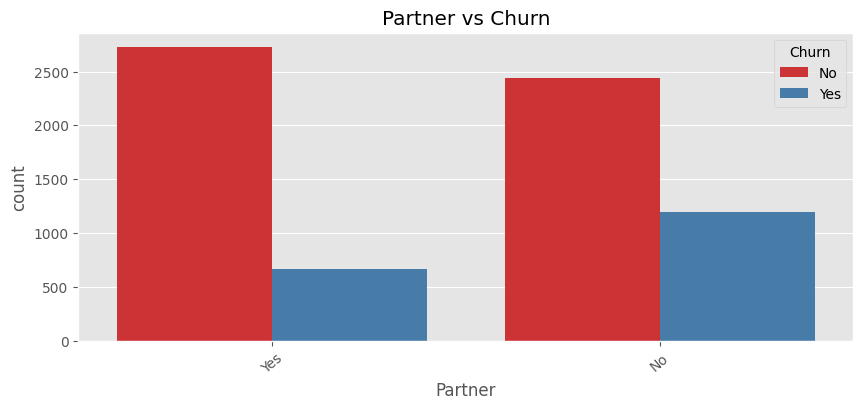

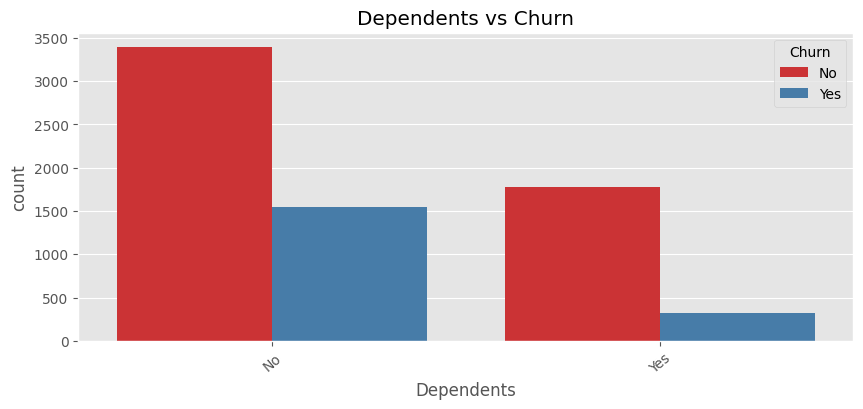

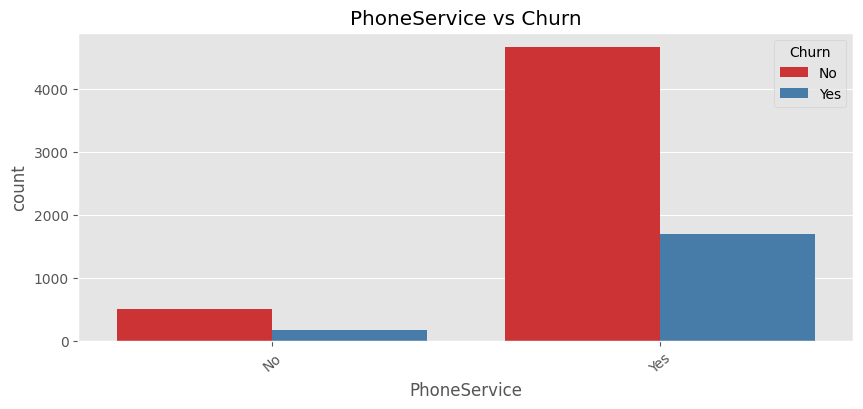

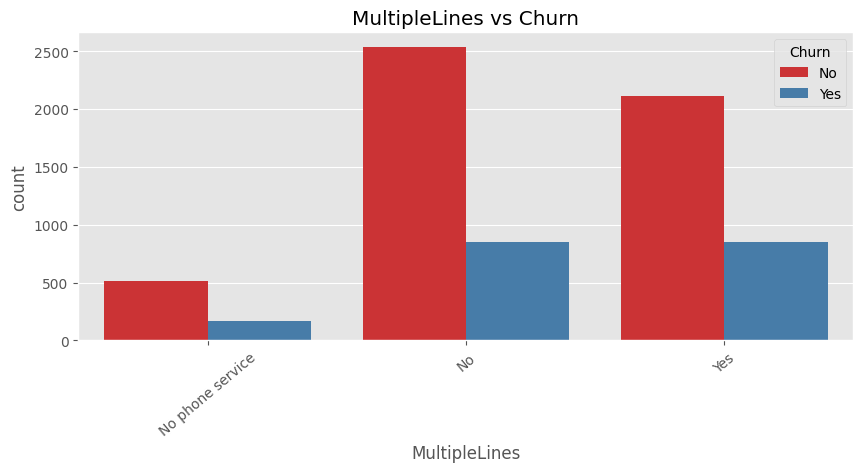

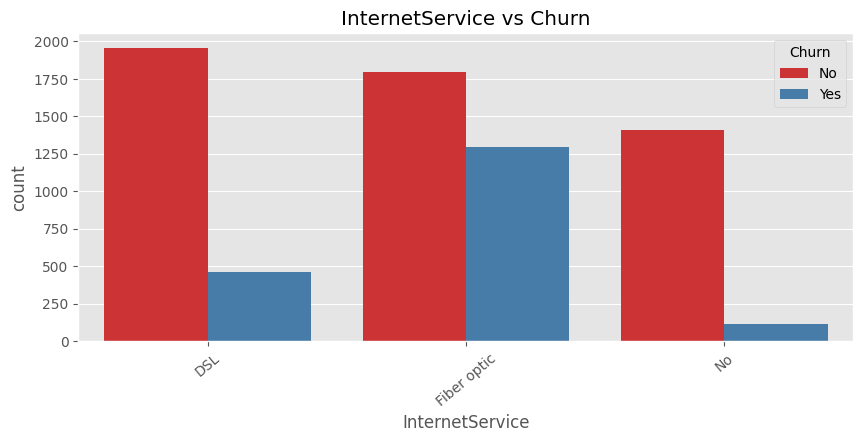

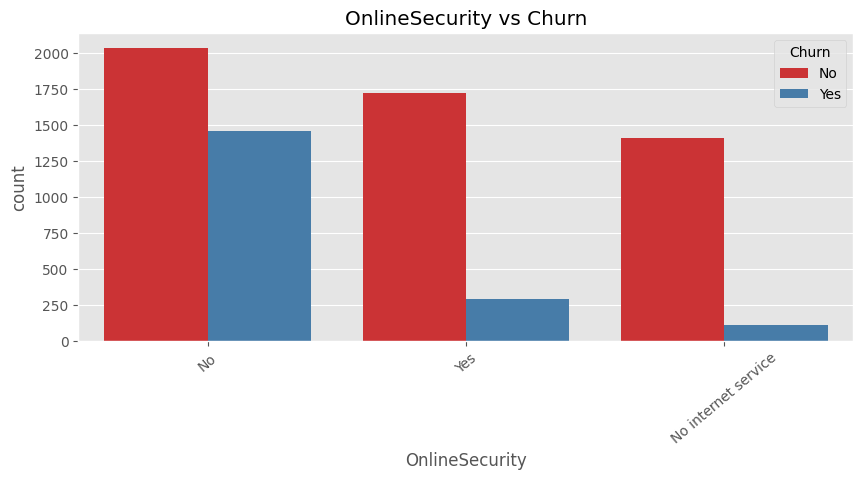

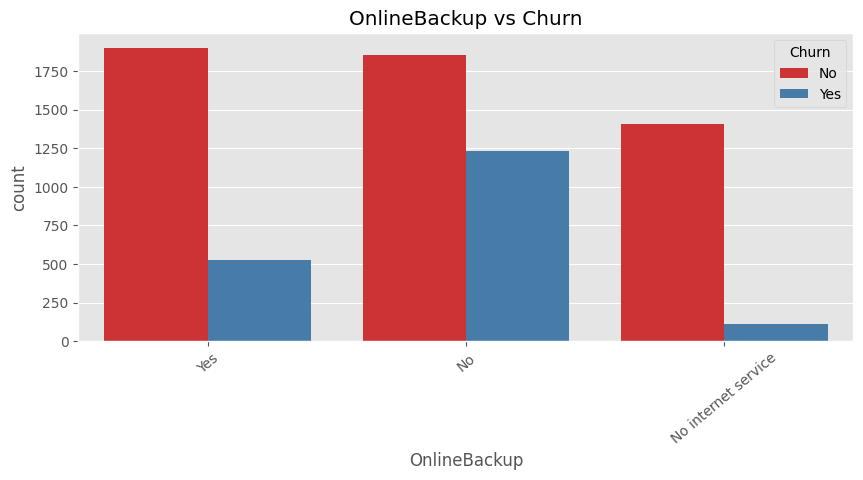

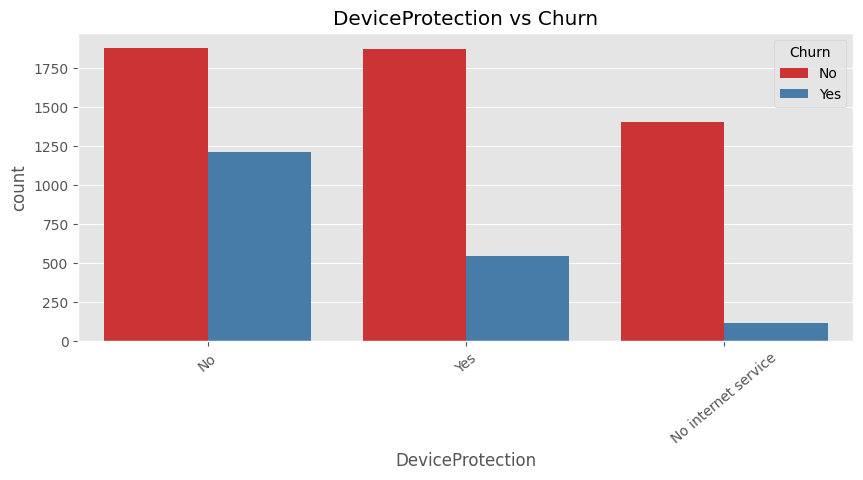

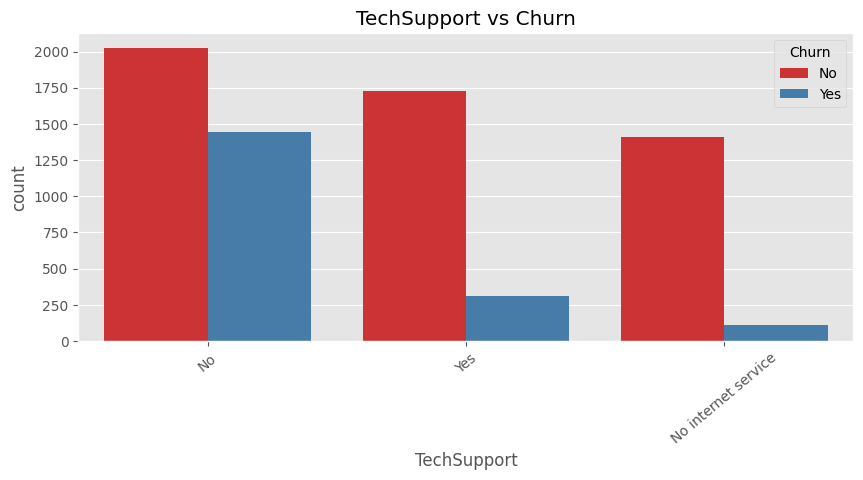

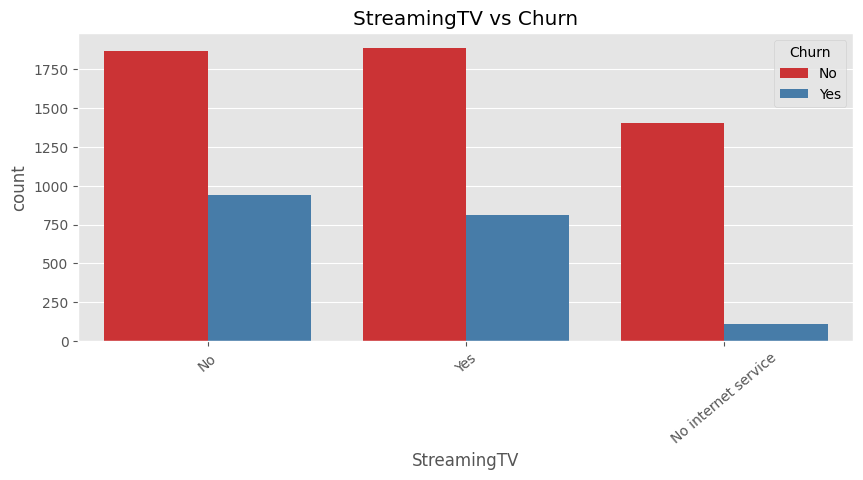

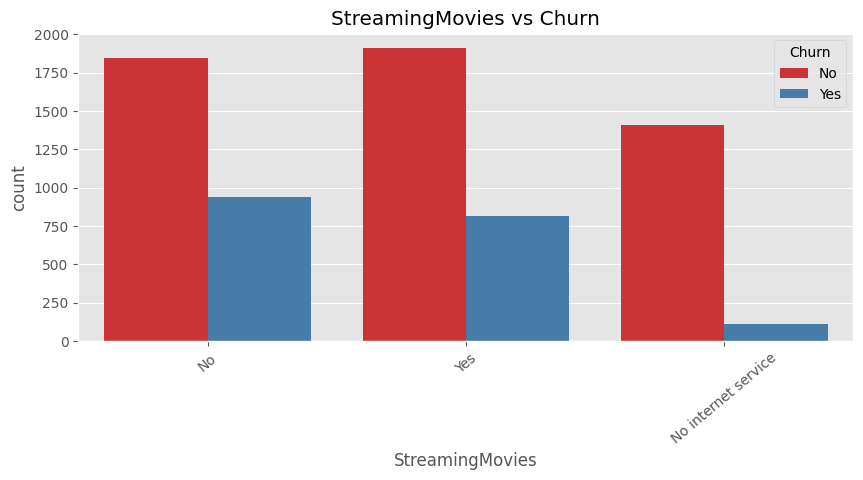

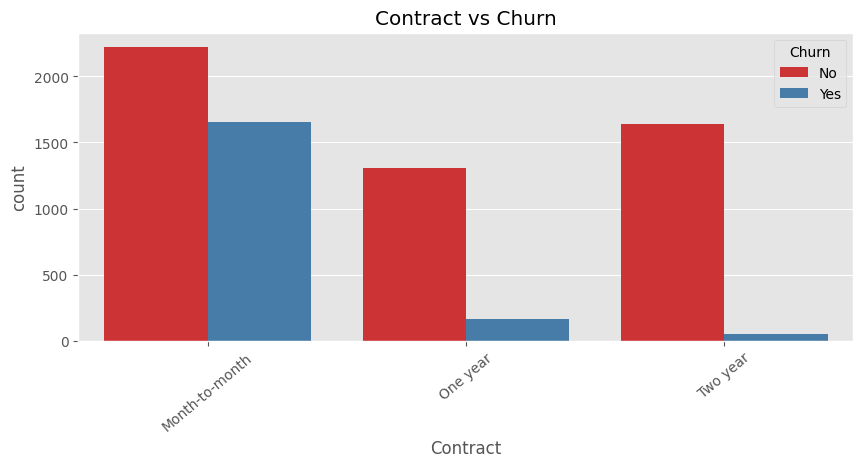

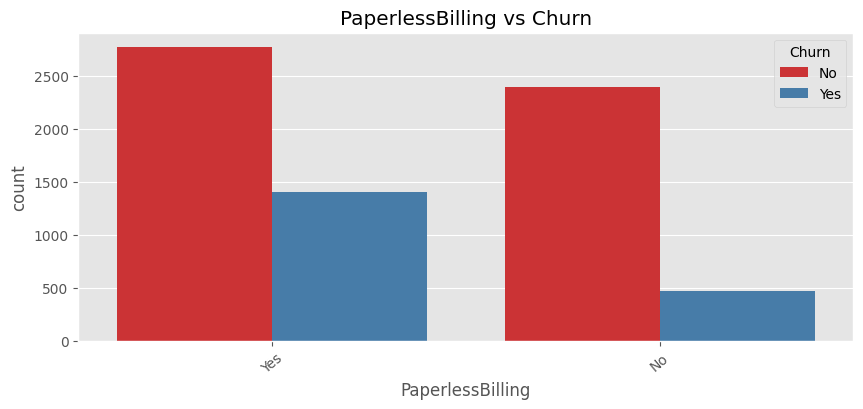

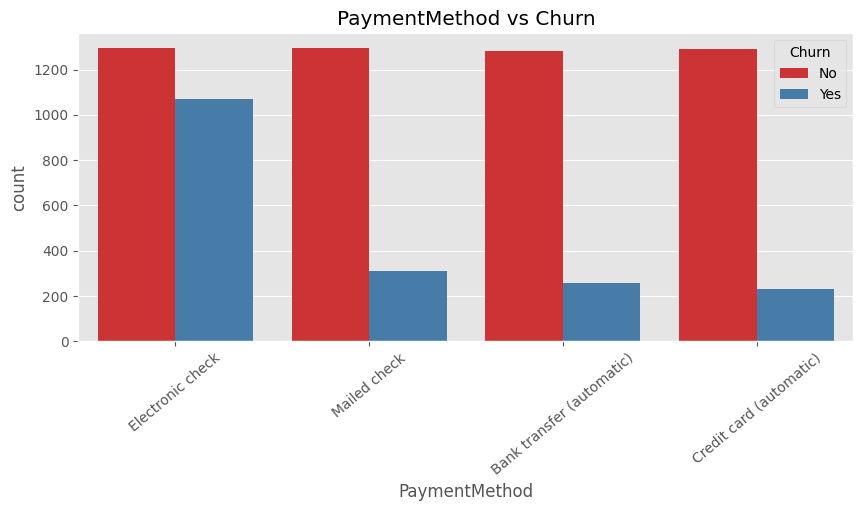

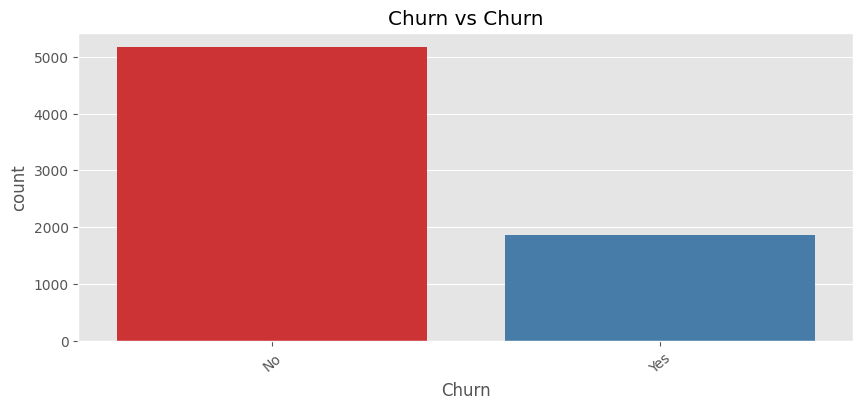

In [288]:
#Churn vs Categorical Features
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=data[col], hue=data['Churn'], palette='Set1')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=40)
    plt.show()


/tmp/ipython-input-1951311794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Churn'], y=data[col], palette='Set3')


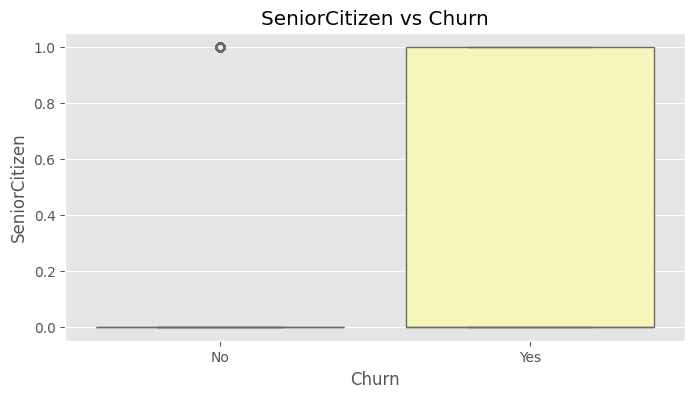

/tmp/ipython-input-1951311794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Churn'], y=data[col], palette='Set3')


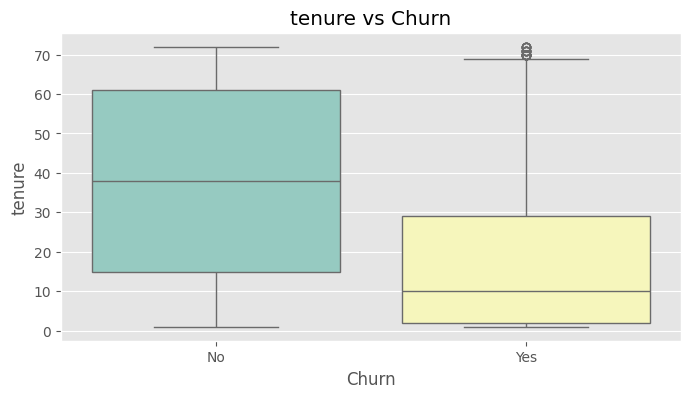

/tmp/ipython-input-1951311794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Churn'], y=data[col], palette='Set3')


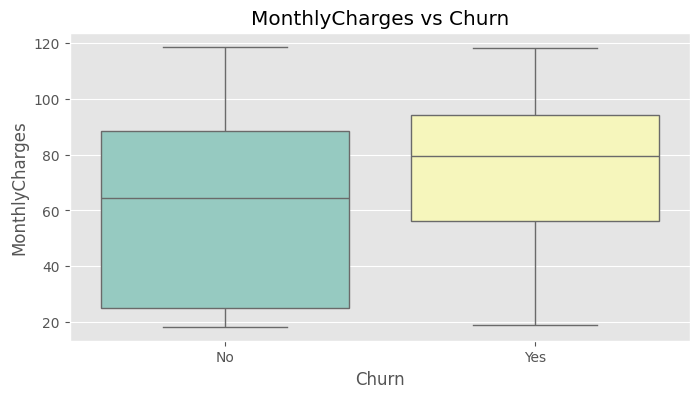

/tmp/ipython-input-1951311794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Churn'], y=data[col], palette='Set3')


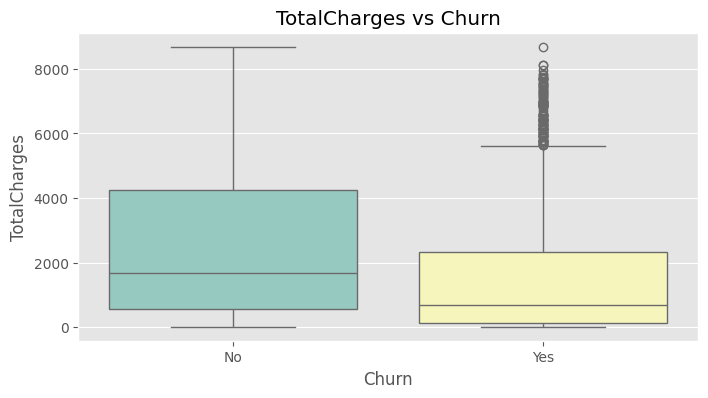

In [289]:
#Churn vs Numerical Features
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data['Churn'], y=data[col], palette='Set3')
    plt.title(f"{col} vs Churn")
    plt.show()


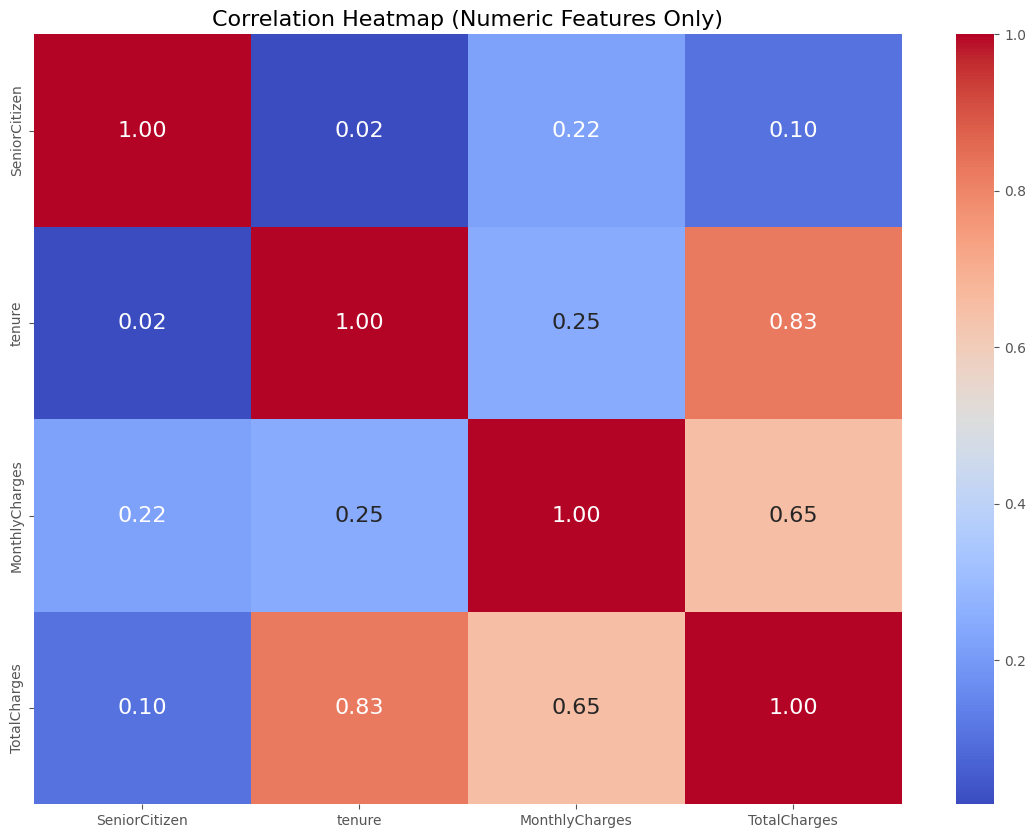

In [290]:
plt.figure(figsize=(14,10))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap with larger numbers
sns.heatmap(
    numeric_data.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 16}
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=16)
plt.show()

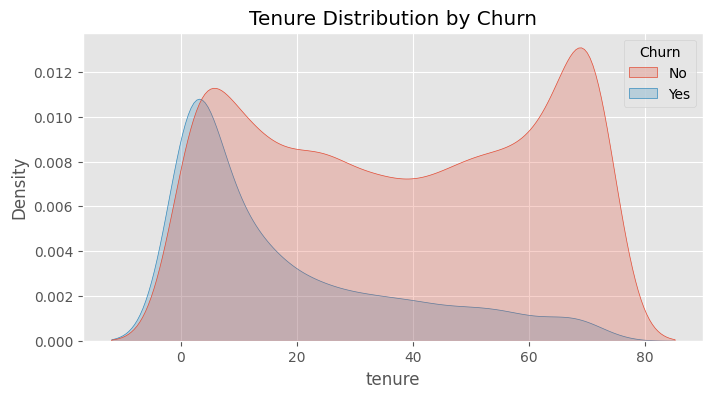

In [291]:
#Tenure distribution by Churn
plt.figure(figsize=(8,4))
sns.kdeplot(data=data, x='tenure', hue='Churn', fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()


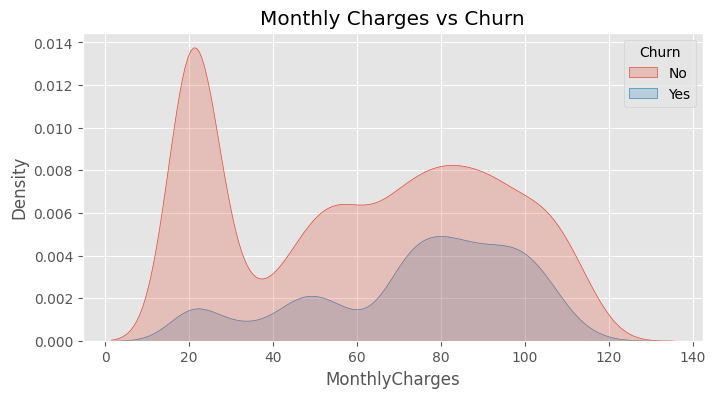

In [292]:
#Monthly Charges vs Churn
plt.figure(figsize=(8,4))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges vs Churn")
plt.show()


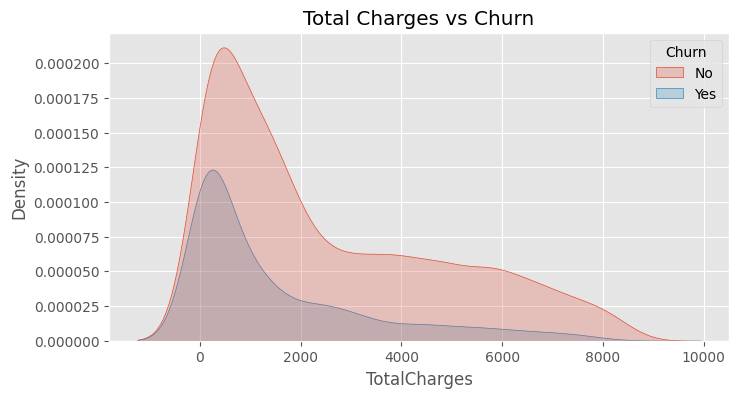

In [293]:
#Total Charges vs Churn
plt.figure(figsize=(8,4))
sns.kdeplot(data=data, x='TotalCharges', hue='Churn', fill=True)
plt.title("Total Charges vs Churn")
plt.show()


In [294]:
#Label encode target variable "Churn"
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})
print(data['Churn'].value_counts())


Churn
0    5163
1    1869
Name: count, dtype: int64


In [295]:
#One-Hot Encode categorical features
data = pd.get_dummies(data, columns=cat_cols.drop("Churn"), drop_first=True)


In [296]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [297]:

'''
# ---- 5.1 Handle TotalCharges (string -> numeric + missing) ----
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# ---- 5.2 Drop customerID (ID field, not useful for prediction) ----
df = df.drop(columns=["customerID"])

# ---- 5.3 Encode binary Yes/No columns ----
binary_cols = ["Partner", "Dependents", "PhoneService",
               "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# ---- 5.4 One-hot encode multi-category categorical columns ----
multi_cols = [
    "gender", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
]

df_encoded = pd.get_dummies(df, columns=multi_cols, drop_first=True)

print("\nAfter encoding, shape:", df_encoded.shape)

# ============================
# 6. TRAIN–TEST SPLIT + SCALING
# ============================

# Target variable (label)
y = df_encoded["Churn"]

# Feature matrix
X = df_encoded.drop(columns=["Churn"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale numerical features (tenure, MonthlyCharges, TotalCharges)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

'''

'\n# ---- 5.1 Handle TotalCharges (string -> numeric + missing) ----\ndf["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")\ndf["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)\n\n# ---- 5.2 Drop customerID (ID field, not useful for prediction) ----\ndf = df.drop(columns=["customerID"])\n\n# ---- 5.3 Encode binary Yes/No columns ----\nbinary_cols = ["Partner", "Dependents", "PhoneService",\n               "PaperlessBilling", "Churn"]\n\nfor col in binary_cols:\n    df[col] = df[col].map({"Yes": 1, "No": 0})\n\n# ---- 5.4 One-hot encode multi-category categorical columns ----\nmulti_cols = [\n    "gender", "MultipleLines", "InternetService", "OnlineSecurity",\n    "OnlineBackup", "DeviceProtection", "TechSupport",\n    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"\n]\n\ndf_encoded = pd.get_dummies(df, columns=multi_cols, drop_first=True)\n\nprint("\nAfter encoding, shape:", df_encoded.shape)\n\n# ============================\n# 6. TRAIN